In [2]:
# Activate your environment with pygor installed, and import pygor.load
# pygor.load will output a message about which classes are available to you.
# This takes a moment to fetch (expect waiting for a few seconds), and will
# only output the first time it is run.
import pygor.load

# Note that `import pygor` is not necessary, and instead you can use `import pygor.[submodule]`.
# This behaviour can be changed depending on demand.

# Give path to your data
data_path = r"strf_demo_data.h5"

Found 6 custom classes in C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes
Class names: ['CenterSurround', 'Core', 'Experiment', 'FullField', 'MovingBars', 'STRF']
Access custom classes using 'from pygor.load import ClassName'


# The Core object

First, we will load a Core data object. The Core object contains the base methods and attribute that are shared among all pygor objects:

In [2]:
# Load the data (you may get some warning messages, these are intended to guide the user on what
# infomration is unavailable due to not existing in the original dataset)
data_object = pygor.load.Core(data_path)

C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:76: UserWarning: 'Averages0' not found in strf_demo_data.h5, setting to np.nan
  self.averages = try_fetch(HDF5_file, "Averages0")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in strf_demo_data.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0")


Now that we have the `data_object`, we can start probing its functionality. 

To do so, we can simply use `data_object.get_help()`. This is a method within `Core` and is shared 
among all pygor objects that inherit `Core`

In [3]:
data_object.get_help()


Welcome to your data object! 
Below are attributes and methods, as well as some metadata.
Pass 'hints = True' for more tips and hints on using the data class.
    ## Class info:
        Current data type: 
        'Core'
        Current metadata: 
       { 'exp_date': datetime.date(2023, 11, 7),
         'exp_time': datetime.time(17, 3, 37),
         'filename': 'strf_demo_data.h5',
         'objectiveXYZ': (-125190.0, -71909.0, -119340.0)}

    ## Attributes
        Here's the data you have access to -> pass 'types = True' for type hints, attr (type):
    [ 'averages', 'filename', 'frame_hz', 'images', 'ipl_depths', 'metadata', 'ms_dur', 'name', 'num_rois',
      'phase_num', 'rois', 'snippets', 'traces_raw', 'traces_znorm', 'trigger_mode', 'triggerstime_frame',
      'triggertimes', 'type']
    
    ## Methods
        Here's some actions you have -> pass 'types = True' for type hints, func (return type):
    [ 'view_drift', 'get_help', 'calculate_image_average', 'plot_averages', 'vi

As we can see, there are already quiet a few attributes and methods we have access to! For example we can do "actions" (methods), these are always assocaited with a parentheses:

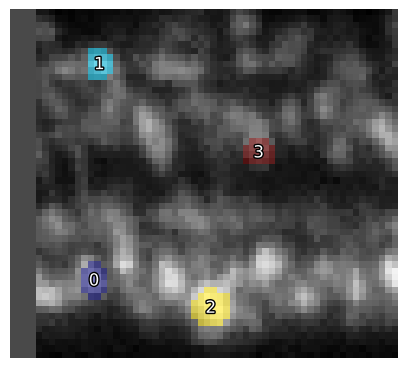

In [4]:
data_object.view_stack_rois()

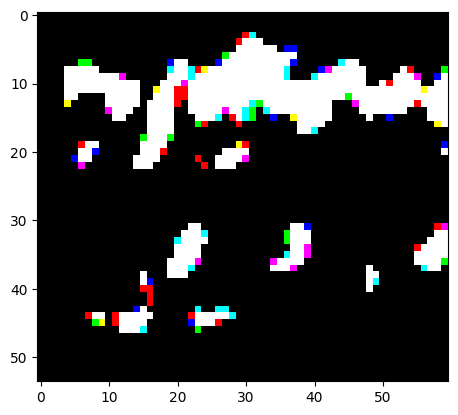

In [5]:
data_object.view_drift()

Or we can check information and load data from the object (attributes):

In [10]:
print(data_object.frame_hz)
print(data_object.trigger_mode)
print(data_object.num_rois)

15.625
1
4


In [23]:
print(data_object.images.shape)  # frame, y, x
data_object.images  # raw wDataCh0_detrended stack

(10000, 54, 60)


array([[[55854, 55854, 55854, ..., 55837, 55833, 55851],
        [55854, 55854, 55854, ..., 55832, 55832, 55830],
        [55854, 55854, 55854, ..., 55840, 55899, 55829],
        ...,
        [55854, 55854, 55854, ..., 55829, 55845, 55834],
        [55854, 55854, 55854, ..., 55832, 55844, 55871],
        [55854, 55854, 55854, ..., 55839, 55946, 55833]],

       [[55854, 55854, 55854, ..., 55837, 55833, 55851],
        [55854, 55854, 55854, ..., 55832, 55832, 55830],
        [55854, 55854, 55854, ..., 55840, 55899, 55829],
        ...,
        [55854, 55854, 55854, ..., 55829, 55845, 55834],
        [55854, 55854, 55854, ..., 55832, 55844, 55871],
        [55854, 55854, 55854, ..., 55839, 55946, 55833]],

       [[55854, 55854, 55854, ..., 55832, 55831, 55837],
        [55854, 55854, 55854, ..., 55832, 55838, 55841],
        [55854, 55854, 55854, ..., 55912, 55832, 55829],
        ...,
        [55854, 55854, 55854, ..., 55834, 55842, 55842],
        [55854, 55854, 55854, ..., 55830, 558

In [22]:
print(data_object.traces_znorm.shape)  # roi, frame
data_object.traces_znorm  # z-normalized traces from ROIs

(4, 10000)


array([[ 2.187373  ,  2.187373  ,  4.98219   , ...,  0.4701497 ,
         0.8686577 ,  1.9852693 ],
       [ 0.41172007,  0.41172007,  0.93057305, ..., -1.9072058 ,
        -1.1494874 , -0.48831642],
       [-1.2461417 , -1.2461417 ,  2.4187045 , ..., -1.4315609 ,
        -1.8121171 , -0.2751207 ],
       [ 1.3803079 ,  1.3803079 ,  1.8525004 , ..., -0.64947313,
        -1.152714  ,  1.2638769 ]], dtype=float32)

In some cases, data may not be present inside the loaded data. For example, this data set does not contain averaged traces. In these cases, the attribute will simply return `None`. This is done for programatic consistency and can be handled by downstream error handling (for example, skipping attributes that return None)

In [19]:
print(data_object.averages)

None


# Other classes
For specific types of data we want specific types of analyses. 

The example dataset is from RF mapping exerpiments using spatio-temporal noise, resulting in spatio-temporal receptive fields (STRFs).

Let's load an STRF object and interrogate it:

In [24]:
strf_object = pygor.load.STRF(data_path)

C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:76: UserWarning: 'Averages0' not found in strf_demo_data.h5, setting to np.nan
  self.averages = try_fetch(HDF5_file, "Averages0")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in strf_demo_data.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\strf_data.py:67: UserWarning: Rotation detected and corrected for strf_demo_data.h5
  self.strfs = pygor.data_helpers.load_strf(HDF5_file)


In [25]:
strf_object.get_help()


Welcome to your data object! 
Below are attributes and methods, as well as some metadata.
Pass 'hints = True' for more tips and hints on using the data class.
    ## Class info:
        Current data type: 
        'STRF'
        Current metadata: 
       { 'exp_date': datetime.date(2023, 11, 7),
         'exp_time': datetime.time(17, 3, 37),
         'filename': 'strf_demo_data.h5',
         'objectiveXYZ': (-125190.0, -71909.0, -119340.0)}

    ## Attributes
        Here's the data you have access to -> pass 'types = True' for type hints, attr (type):
    [ 'averages', 'bs_bool', 'bs_settings', 'filename', 'frame_hz', 'images', 'ipl_depths', 'metadata', 'ms_dur',
      'multicolour', 'name', 'num_rois', 'num_rois_sig', 'num_strfs', 'numcolour', 'phase_num', 'pval_space',
      'pval_time', 'rf_masks_combined', 'rois', 'snippets', 'stim_size', 'stim_size_arbitrary', 'strf_keys',
      'strfs', 'strfs_chroma', 'traces_raw', 'traces_znorm', 'trigger_mode', 'triggerstime_frame',
      't

C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\strf_data.py:90: UserWarning: No numbers found in name, cannot extract stimulus size. Returning np.nan instead.
  warnings.warn("No numbers found in name, cannot extract stimulus size. Returning np.nan instead.")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\strf_data.py:90: UserWarning: No numbers found in name, cannot extract stimulus size. Returning np.nan instead.
  warnings.warn("No numbers found in name, cannot extract stimulus size. Returning np.nan instead.")


Okay, there's quite a lot going on here. Let's break down what's going on: 
- The Methods and Attributes behave in the same way as for the `Core` object, in fact you will see that everything in `Core` also exists in `STRF` due to inheritance. 
- The methods of `STRF` are by convention associated with submodules in the corresponding folder `pygor/strf`. 
- Each method in `STRF` either is a very simple function that does something simple, or a shortcut to longer and complex functions within `pygor/strf`

So, think of the `STRF` object as the easy-to-access place for things you do frequently. If you find yourself heavily relying on a cell in a Jupyter Notebook to do an operation over and over again, its probably a strong indicator that this should be a method within `STRF`. Moreover, if that cell is tens of lines long, or features multiple sub-functions, that should probably be organised into a submodule, and the submodule called from the `STRF` method. 

There are no hard rules (except for inheritance of the `Core` object and loading via `pygor.load`), but following these suggestions will help keep the code clean. 

Note that the in-built Python `help` will work with pygor functions. In fact, it is highly recommended that you write docstring, at least a sentence saying what the function does. Type annotations are very welcome: https://docs.python.org/3/library/typing.html

In [29]:
help(strf_object.get_strf_masks)

Help on method get_strf_masks in module pygor.classes.strf_data:

get_strf_masks(level=None, force_recompute=False) -> tuple[numpy.ndarray, numpy.ndarray] method of pygor.classes.strf_data.STRF instance
    Return masked array of spatial.rf_mask3d applied to all arrays, with masks based on pval_time and pval_space,
    with polarity intact.



In [32]:
strf_object.get_strf_masks()

masked_array(
  data=[[[[[--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           ...,
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --]],

          [[--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           ...,
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --]],

          [[--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           ...,
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --]],

          ...,

          [[--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           [--, --, --, ..., --, --, --],
           ...,
           [--, --

# Building your own classes
Building classes in pygor is intended to be easy. This is because different users will have different needs, which may be shared by others in the future. Pygor's classes are based on [dataclasses](https://docs.python.org/3/library/dataclasses.html)

Here is a minimal example of what a class can look like:

In [42]:
from dataclasses import dataclass
from pygor.classes.core_data import Core  # get Core from pygor's classes


@dataclass()
class ExampleClass(Core):  # inherit Core
    # Default attributes (opptional but useful), with type annotation
    datatype: str = "FFF"

    # Set post init attributes (not optional)
    def __post_init__(self):
        # Post initialise the contents of Data class to be inherited
        super().__post_init__()


example_object = ExampleClass(data_path)
example_object

C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:76: UserWarning: 'Averages0' not found in strf_demo_data.h5, setting to np.nan
  self.averages = try_fetch(HDF5_file, "Averages0")
C:\Users\SimenLab\Git_repos\pygor\src\pygor\classes\core_data.py:77: UserWarning: 'Snippets0' not found in strf_demo_data.h5, setting to np.nan
  self.snippets = try_fetch(HDF5_file, "Snippets0")


ExampleClass(filename=WindowsPath('strf_demo_data.h5'), metadata={'filename': 'strf_demo_data.h5', 'exp_date': datetime.date(2023, 11, 7), 'exp_time': datetime.time(17, 3, 37), 'objectiveXYZ': (-125190.0, -71909.0, -119340.0)}, rois=array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32), type='ExampleClass', frame_hz=15.625, averages=None, snippets=None, ms_dur=None, phase_num=1, num_rois=4, datatype='FFF')

Let's go through what happens here:
- Imports: dataclasses.dataclass and pygor.classes.core_data, combinding these enables us to create a new pygor object
- @dataclass(): This is a decorator that tells Python that the class is a [dataclass](https://docs.python.org/3/library/dataclasses.html). Essentially, this takes care of a bunch of boilerplate code that normally would allow for advanced classes. But since we moslty just want to store data and do operations to it, we can get away with the automated filling-in of these special methods (like `__init__()` and `__repr__()`)
- `def __post_init__(self):` : Because we are using dataclasses, this enables changing the stored information after the object has been instanciated (https://docs.python.org/3/library/dataclasses.html#post-init-processing). This has two implications:
    
    1. Allows you to use the .self attribute to do operations when the class gets called (for example, use self.filename to print the location of the file when object is created), and therefore...
    2. Make changes to the default attributes, even if they come from the `Core` object
- Relatedly, you must always call `super().__post_init__()`. This ensures the `__post_init__()` in the parent object (`Core`) correctly triggers 
